# 数据预处理（归一+可视化）

In [1]:
import pandas as pd
data=pd.read_excel('中心城市客运量 巡游出租汽车 广州 .xlsx',engine='openpyxl',header=0)
print(data.shape)
data.head()

(48, 3)


,时间,中心城市客运量:巡游出租汽车:广州:当期值:月,归一值
0,2022-12-31,1488,0.03
1,2022-11-30,1355,0.00
2,2022-10-31,2489,0.27
3,2022-09-30,3110,0.42
4,2022-08-31,3481,0.51


In [2]:
# 将时间列转换为日期时间类型并按时间升序排列
data['时间'] = pd.to_datetime(data['时间'])
data = data.sort_values(by='时间')

In [3]:
# 重置索引并添加新的序号列
data = data.reset_index(drop=True)

In [4]:
data.head()

,时间,中心城市客运量:巡游出租汽车:广州:当期值:月,归一值
0,2019-01-31,5391,0.97
1,2019-02-28,4451,0.74
2,2019-03-31,5515,1.00
3,2019-04-30,5249,0.94
4,2019-05-31,5083,0.90


In [5]:
data.columns

Index(['时间', '中心城市客运量:巡游出租汽车:广州:当期值:月', '归一值'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   时间                       48 non-null     datetime64[ns]
 1   中心城市客运量:巡游出租汽车:广州:当期值:月  48 non-null     int64         
 2   归一值                      48 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.3 KB


In [7]:
import matplotlib.pyplot as plt

C:\Users\86158\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


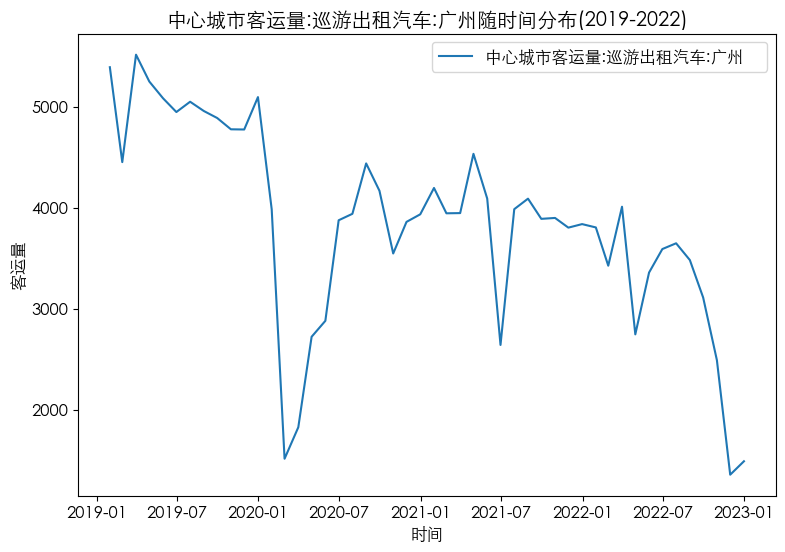

In [8]:
# 绘制折线图
plt.rc('font', family='STXihei', size=12)
plt.figure(figsize=(9, 6))
plt.plot(data['时间'], data['中心城市客运量:巡游出租汽车:广州:当期值:月'], label='中心城市客运量:巡游出租汽车:广州	')
plt.xlabel('时间')
plt.ylabel('客运量')
plt.title('中心城市客运量:巡游出租汽车:广州随时间分布(2019-2022)')
plt.legend()
plt.grid(False)
plt.show()

In [9]:
df = pd.DataFrame(data)
df

,时间,中心城市客运量:巡游出租汽车:广州:当期值:月,归一值
0,2019-01-31,5391,0.97
1,2019-02-28,4451,0.74
2,2019-03-31,5515,1.00
3,2019-04-30,5249,0.94
4,2019-05-31,5083,0.90
5,2019-06-30,4947,0.86
6,2019-07-31,5049,0.89
7,2019-08-31,4957,0.87
8,2019-09-30,4888,0.85
9,2019-10-31,4776,0.82


C:\Users\86158\AppData\Local\Temp\ipykernel_31904\1295047658.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['归一值'],kde=False, rug=True)


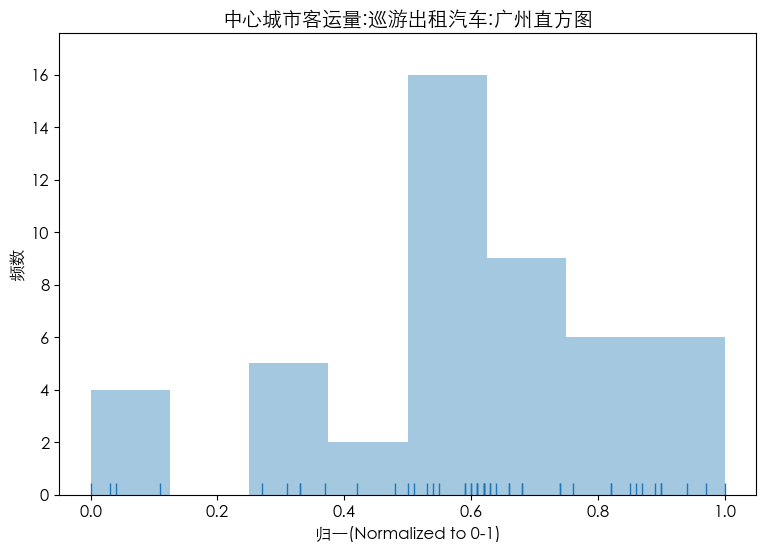

In [10]:
import seaborn as sns
plt.figure(figsize=(9, 6))
sns.distplot(df['归一值'],kde=False, rug=True)
plt.xlabel('归一(Normalized to 0-1)')
plt.ylabel('频数')
plt.title('中心城市客运量:巡游出租汽车:广州直方图')
plt.show()